# The US Accidents Exploratory Data Analysis
USA experiences a large numeber of accidents every year. Here we intend to analyze the geographic and weather data of those accidents and generate some insights. 
<center><img src = "images/accident image.jpg"></center>

- use_plotly:true
- badges:true
- comments:true
- categories: ['pandas', 'numpy', 'matplotlib', 'seaborn', 'folium','plotly']
- image : images/accident image.jpg

### Importing the nescessary Libraries

In [77]:
import pandas as pd                            # For manipulating Tabular Data
import numpy as np                             # For fast operations on array like data structures
import matplotlib.pyplot as plt                # For plotting and grpahs
import seaborn as sns                          # A library built on top of Matplotlib also used for plotting
import folium                                  # For plotting geographical plots
from folium import plugins
import plotly.graph_objects as go             # For plotting graphs with plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Reading in the Data
For reading files in we use the Pandas library which provides easy, fast and reliable way to read CSV (Comma Seperated Values) and other formats. 

In [2]:
df = pd.read_csv('D://Datasets/US_Accidents.csv')       # This function creates a Tabular structure called as DataFrame for us which facilitates an easy manipulation of rows and Columns.

#### Setting display so that the DataFrame shows all the columns in the CSV file
This line of code here is a pandas function which allows us to display at maximum the number of columns on the right becuse sometimes when there are too many columns JUPYTER trims the contents of the DataFrame fit the whole DataFrame in the display.

In [3]:
pd.options.display.max_columns = 50            

#### Displaying the the DataFrame

In [4]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

#### The next snippet of code provides a small information about the columns such as datatypes of the Columns, Number of Non-Null values in the Columns etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

#### We can see that some of the columns have NUll values. Lets plot the percentage the Null values because it might come handy for later analysis.

In [6]:
missing_values = df.isna().sum().sort_values(ascending = False) 
missing_percentages = missing_values/ len(df)
missing_percentages = missing_percentages[missing_percentages != 0]  # just taking the columns whose percentage of Null values is not equal to zero.
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
dtype: float64

the `.isna()` method just tells us that the value in a row or column is NULL or not (True/False) and the `.sum()` just sums up the number of True's (treats Ture's as 1 and False as 0) and the `.sort_values(ascending = False)` sorts the values in desending order and gives out the result.


#### Plotting the percentage of missing values

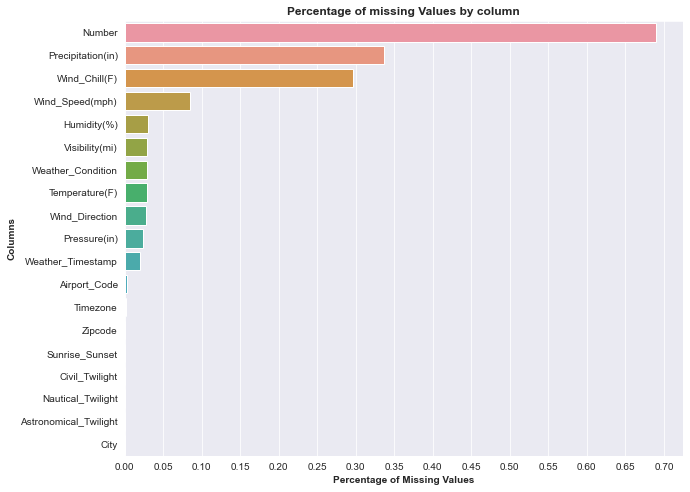

In [7]:
sns.set_style('darkgrid')                                                    # Sets the style of the plots to a predefined style which is handeled by the seaborn package
plt.figure(figsize = (10,8))                                                 # Sets the total size of the figure on which we would plot the contents.
plt.title('Percentage of missing Values by column', weight = 'bold')         # Sets the title of the plot
plt.xlabel('Percentage of Missing Values',weight = 'bold')                   # Sets the label text to be displayed at the x-axis
plt.xticks(np.arange(0,1, 0.05))                                             # Sets the tick values of the x-axis. Can be chaged for the y axis
plt.ylabel('Columns' ,weight = 'bold')                                       # Sets the label text to be displayed at the y-axis
sns.barplot(x = missing_percentages.values, y = missing_percentages.index)   # Plots a barplotof the values
plt.show()                                                                   # Shows the figure (This is an optional step as JUPYTER automatically renders the figure in the output)

#### Summary Statistics
Now lets have a quick look at the summary statistics of the numerical columns. The `DataFrame.describe()` function provides us the summary statistics of all the numerical columns in the DataFrame.

In [8]:
df.describe().T           # The .T in df.describe().T just Transposes the columns and rows to increase the readability.

,count,mean,std,min,25%,50%,75%,max
Severity,1516064.0,2.238630,0.608148,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,1516064.0,36.900558,5.165653,24.570222,33.854225,37.351130,40.725927,4.900058e+01
Start_Lng,1516064.0,-98.599194,18.496022,-124.497567,-118.207575,-94.381003,-80.874690,-6.711317e+01
End_Lat,1516064.0,36.900606,5.165629,24.570110,33.854204,37.351342,40.725930,4.907500e+01
End_Lng,1516064.0,-98.599010,18.495903,-124.497829,-118.207746,-94.379875,-80.874490,-6.710924e+01
Distance(mi),1516064.0,0.587262,1.632659,0.000000,0.000000,0.178000,0.594000,1.551860e+02
Number,469969.0,8907.533114,22421.896710,0.000000,1212.000000,4000.000000,10100.000000,9.999997e+06
Temperature(F),1473031.0,59.584597,18.273164,-89.000000,47.000000,61.000000,73.000000,1.706000e+02
Wind_Chill(F),1066748.0,55.109760,21.127345,-89.000000,40.800000,57.000000,71.000000,1.130000e+02
Humidity(%),1470555.0,64.659601,23.259865,1.000000,48.000000,68.000000,84.000000,1.000000e+02


### Exploratory Data Analysis and Visualization

#### The List of the columns in the DataFrame are :

In [9]:
df.columns                                # The .columns() method ouputs a List of all the  columns in the DataFrame.

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### We would Analyze some of the columns because there are many columns which could be explored at a later stage.
1. `City`                        --> The cities where the Accidents take place
2. `Start_Time`                  --> The starting time of the accidents
3. `Start_Lat`                  --> The starting latitude of the accidents
4. `Start_Lng`                   --> The starting longitude of the accidents
5. `State`                       --> The States in which the accidents happened
6. `Temperature`                 --> The temperature when the accident happened
7. `Weather Condition`           --> The weather conditions when the accident happened
8. `Visibility`                  --> The visibility distance 
9. `Preciptation`                --> The precipitation record of the area
10. `Severity`                    --> The rate of severity of the accident


### CITY Column

In [10]:
df['City'].head()       # This is the syntax for getting a column from a DataFrame. It is called a Series and a collection of series makes up a DataFrame.

0        Dublin
1        Dayton
2    Cincinnati
3    Cincinnati
4         Akron
Name: City, dtype: object

In [11]:
cities = df['City'].unique()           # Find unique cities in the DataFrame
len(cities)                            # Find the number of Unique cities by taking the length of the list cities

10658

#### We should look at the Cities where a high number of accidents take place

In [12]:
cities_by_accidents = df['City'].value_counts()     # the value_counts() method gives the number of times a certain value appears in the Series Cities.
cities_by_accidents.head()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

#### Now we will visualize the Top 50 cities where the most accidents happened.

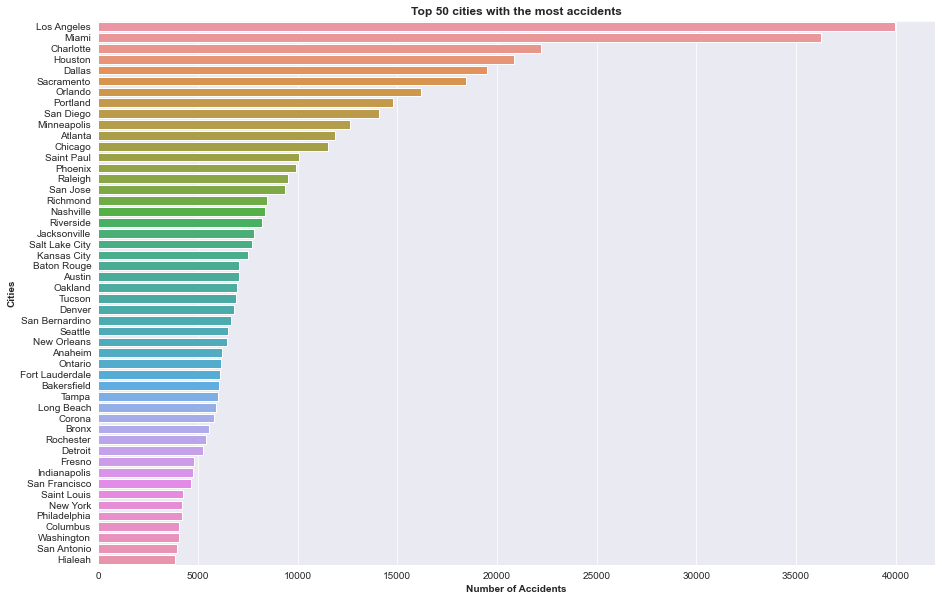

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))                                                             # Sets the figure size of the plot
plt.title('Top 50 cities with the most accidents', weight = 'bold')                       # Sets the title of the plot
plt.xlabel('Number of Accidents',weight = 'bold')                                         # Sets the x-axis label of the plot
plt.ylabel('Cities' ,weight = 'bold')                                                     # sets the y-axis label of the plot
sns.barplot(x = cities_by_accidents[:50].values, y = cities_by_accidents[:50].index)      # Plots the bargraph for the Data. The SNS is the alias for the Seaborn library for plotting
plt.show()                                                                                # used to disply the plot. This is optional as JUPYTER notebooks automatically renders the plot.

#### Insights
1. The cities of Los Angeles and Miami have the highest number of Accidents.
2. New York Though it is a bustling city has a dramatically lower accident rate

#### Now lets see the distribution of the Accidents of the top 50 cities

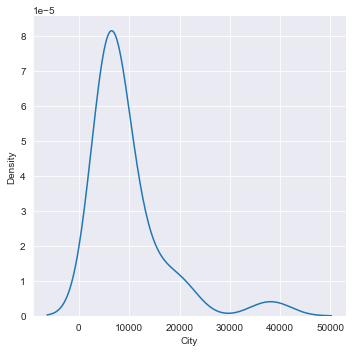

In [14]:
sns.displot(data = cities_by_accidents[:50], kind = 'kde')     # The [:30] takes up the the values from index 0 - 29 and plots them for the plot.
plt.show()

We can see in the above plot that the distribution of the accidents is skewed to the right and has a long tail. So we can containarize our accidents of the cities into low accident cities and high accident cities.

In [15]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]                                 # number of accidents greater than 1000
low_accident_cities = cities_by_accidents[cities_by_accidents <= 1000]                                  # number of accidents lesser than 1000
print(f'The percentage of high accident cities : {len(high_accident_cities)/len(cities) *100:.2f} %')
print(f'The percentage of low accident cities : {len(low_accident_cities)/len(cities)*100:.2f} %')

The percentage of high accident cities : 2.36 %
The percentage of low accident cities : 97.64 %


#### Now we will plot the histograms of high_accident_cities and low_accident_cities to see how they fare up and we can also see their distributions

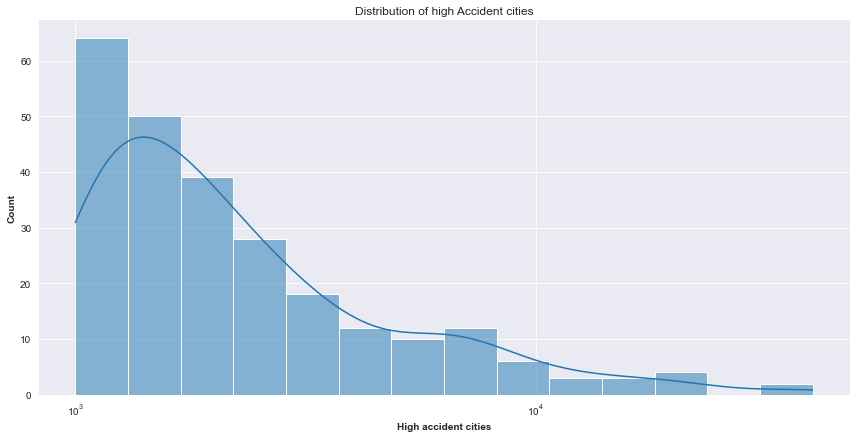

In [16]:
sns.displot(data = high_accident_cities, kind = 'hist', kde = True, log_scale = True,height = 6, aspect = 12/6).set(title = 'Distribution of high Accident cities')
plt.xlabel('High accident cities', weight = 'bold')
plt.ylabel('Count',weight =  'bold')
plt.show()


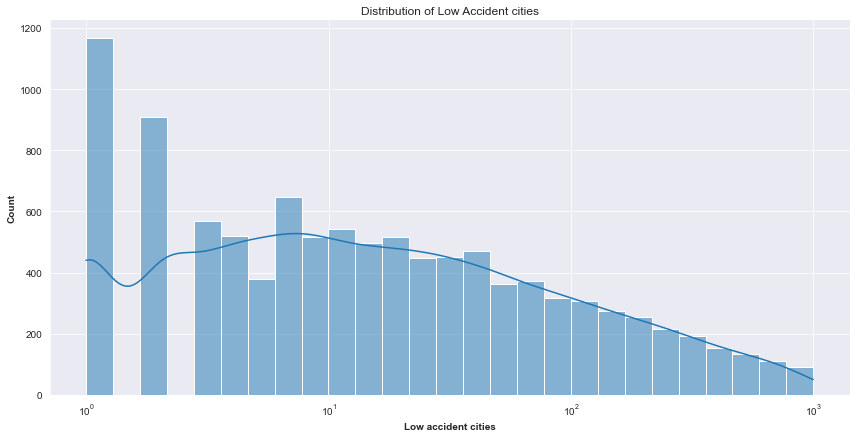

In [17]:
sns.displot(data = low_accident_cities, kind = 'hist',kde = True, log_scale = True,height = 6, aspect = 12/6).set(title = 'Distribution of Low Accident cities')
plt.xlabel('Low accident cities', weight = 'bold')
plt.ylabel('Count',weight =  'bold')
plt.show()

1. There are some NULL values which explain the missing buckets in the histogram. But I have tried to perform the analysis without modifying the data in any way.
2. We can see that the distribution of the low accident cities and high accident cities have a fairly Normal Distribution but the distribution is Not strictly normal.

___________________________________________________________________________________________________________________________________________________________________________________________

#### START_TIME COLUMN
The Start_Time column is a datetype Column which has the Starting Time of every accident but the format is object type(which is natively string in Python).

In [18]:
df['Start_Time'].head()

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:15:39
4    2016-02-08 06:51:45
Name: Start_Time, dtype: object

The dtype = Object shows us that the Start_Time column contains data which is of String type, as in Python obbjects are natively strings So we need to convert it into a Special data type called as Datetime. The Datetime format provides other helper methods for easy and fast manipulation of Dates and Time.

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])    # The to_datetime() function of Python Pandas converts other formats to Datetime format and then we are again assigning it to Start_Time column.

Now after converting it to datetime if we check the dtype we can see that it shows dtype = datetime64[ns]

In [20]:
df['Start_Time'].head()

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:15:39
4   2016-02-08 06:51:45
Name: Start_Time, dtype: datetime64[ns]

In [21]:
df['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

Now we would see the 24 hour distribution of the accidents and for that we would need to plot the histogram for the column Start_Time

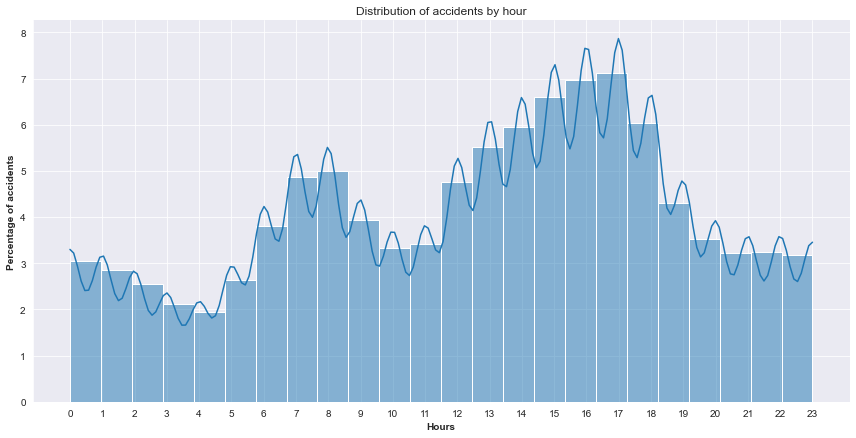

In [22]:
sns.displot(data = df['Start_Time'].dt.hour, bins = 24,kde = True,stat = 'percent', height = 6, aspect= 12/6 ).set(title = 'Distribution of accidents by hour')
plt.xlabel('Hours', weight = 'bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Percentage of accidents',weight =  'bold')
plt.show()

The plot can be understood by the way that the height of each Bar shows the percentage of each bin with respect to the overall 100 percent. For eg. the first bin of 0-1 is 3% of the
overall percentage and so on. So 3% of accidents happen between 0 and 1 hour in a 24 hour clock.

#### Insights
1. A high percentage of accidents occur between 6 - 10 am. Probably people in a hurry to get to work.
2. Then the percentage of accidents drop between 11am - 3pm.
3. The highest percentage of accidents occur between 2pm - 7pm with the highest being recorded at 5pm. So probably people rushing to get home after work.

#### Now lets find out if the accidents have increased or decreased on a year by year basis.

<AxesSubplot:title={'center':'Accidents by year'}, xlabel='Year', ylabel='Number of Accidents'>

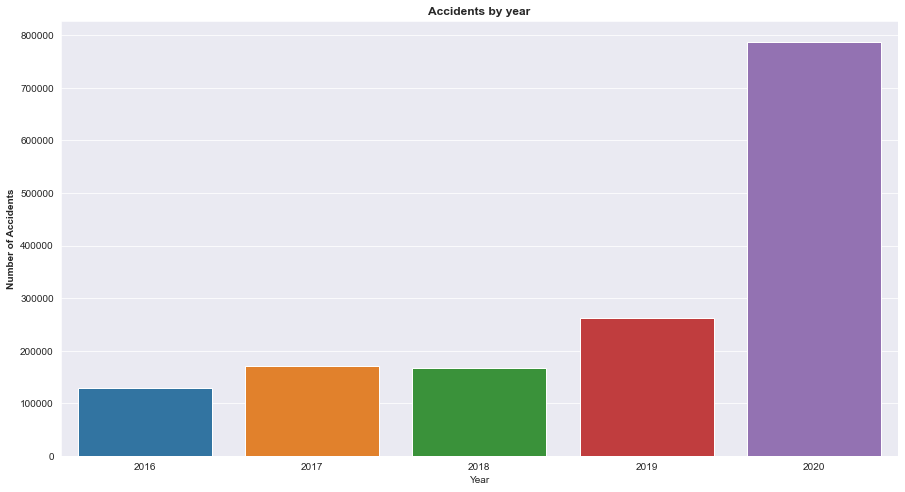

In [23]:
df['Year'] = df['Start_Time'].dt.year
year_df = df['Year'].value_counts()
plt.figure(figsize = (15,8))
plt.xlabel('Year')
plt.ylabel('Number of Accidents', weight = 'bold')
plt.title('Accidents by year', weight = 'bold')
sns.barplot(x = year_df.index, y = year_df.values)

#### Insights
1. The Accidents by the year follow an exponentially increasing trend. But this might be the case that the data for the year 2020 has been the most documented

#### Now lets see the distribution of accidents for the Days of the Week

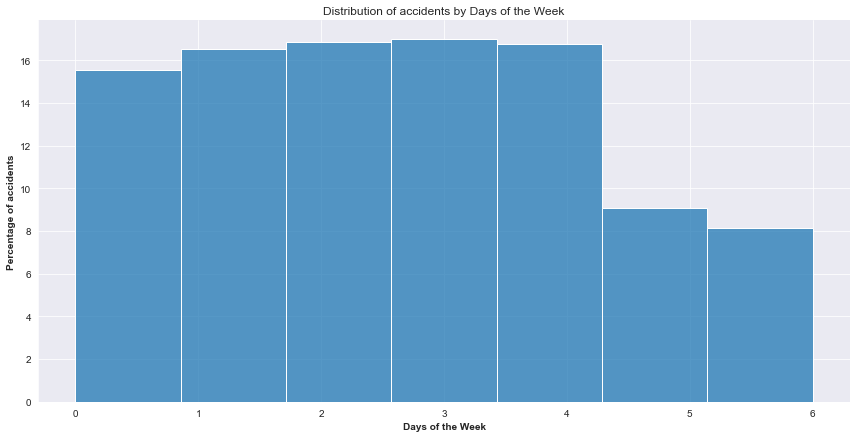

In [24]:
sns.displot(data = df['Start_Time'].dt.dayofweek, bins = 7,stat = 'percent', height = 6, aspect= 12/6 ).set(title = 'Distribution of accidents by Days of the Week')
plt.xlabel('Days of the Week', weight = 'bold')
"""
{0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

"""
plt.xticks([0,1,2,3,4,5,6])
plt.ylabel('Percentage of accidents',weight =  'bold')
plt.show()

#### Insights
1. On weekdays the number of accidents is significantly higher
2. On weekends the number of accidents is lower.
 

#### Now lets see the distribution of accidents on Saturday's and Sunday's to see if the weekends also follow the trend of weekdays and the majority of accidents happen at some peak hours or the accidents are distributed evenly over the day.

In [25]:
sundays = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
saturdays = df['Start_Time'][df['Start_Time'].dt.dayofweek == 5]
mondays = df['Start_Time'][df['Start_Time'].dt.dayofweek == 0]

In [26]:
sundays.head()

158   2016-02-14 03:58:33
159   2016-02-14 05:26:58
160   2016-02-14 16:30:40
161   2016-02-14 16:38:40
162   2016-02-14 17:40:17
Name: Start_Time, dtype: datetime64[ns]

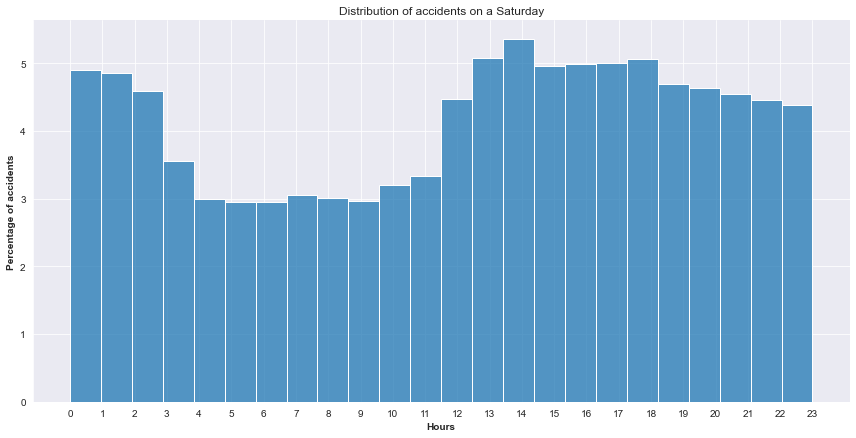

In [27]:
sns.displot(data = saturdays.dt.hour, bins = 24,stat = 'percent', height = 6, aspect= 12/6 ).set(title = 'Distribution of accidents on a Saturday')
plt.xlabel('Hours', weight = 'bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Percentage of accidents',weight =  'bold')
plt.show()

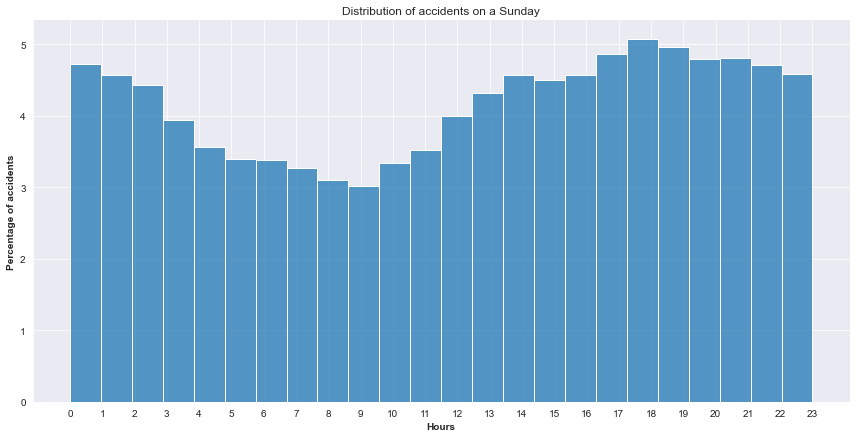

In [28]:
sns.displot(data = sundays.dt.hour, bins = 24,stat = 'percent', height = 6, aspect= 12/6 ).set(title = 'Distribution of accidents on a Sunday')
plt.xlabel('Hours', weight = 'bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Percentage of accidents',weight =  'bold')
plt.show()

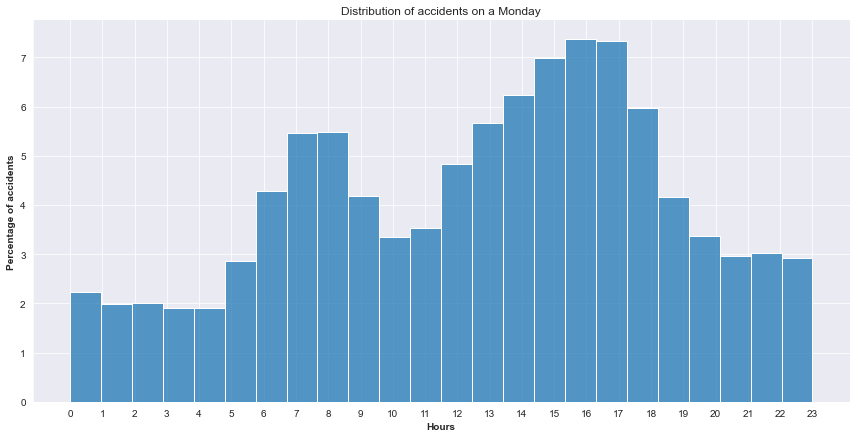

In [29]:
sns.displot(data = mondays.dt.hour, bins = 24,stat = 'percent', height = 6, aspect= 12/6 ).set(title = 'Distribution of accidents on a Monday')
plt.xlabel('Hours', weight = 'bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Percentage of accidents',weight =  'bold')
plt.show()

#### Insights
1. On saturdays and sundays the accidents are more distributed and no peak hours are there.
2. On mondays the accident have a very dominant peak between 8 - 10 am and between 5-7 pm indicating that the hypothesis was correct as accidents happen at rush hour.

### Lets see which months have a high number of accidents.

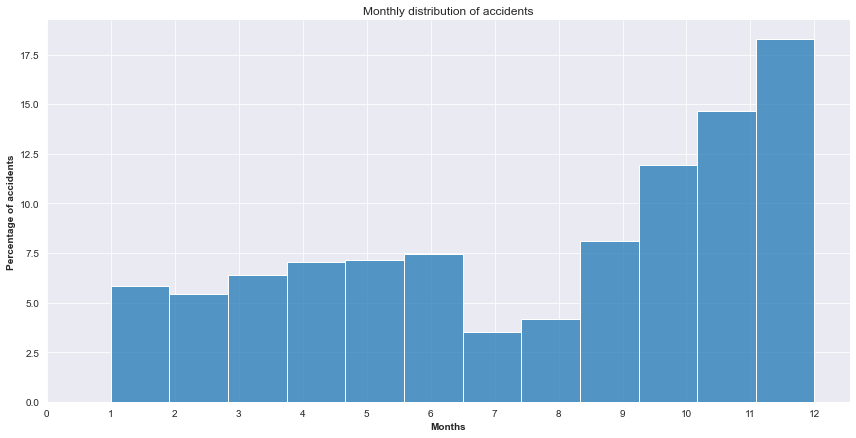

In [30]:
sns.displot(data = df['Start_Time'].dt.month, bins = 12,stat = 'percent', height = 6, aspect= 12/6 ).set(title = 'Monthly distribution of accidents')
plt.xlabel('Months', weight = 'bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('Percentage of accidents',weight =  'bold')
plt.show()

#### Insights
1. The months data shows that months between OCT - DEC have the most accidents.
2. The month of July and August has the least number accidents.
3. The data of accidents shows that the during the summer months there are less accidents but what needs to be taken into account that the accidents are the lowest in the Monsoon season. This needs to be explored further.

#### Lets try to understand is the monthly data is correct by first checking that the data for the each of the years individually. If the find the same distribution for all the years then there is evidence that the trend is good but if the distribution is not the same then we should just say that the data is incorrect.

#### First lets filter the dataframe Start_Time column with by years so that we can individual series of years which we will use to plot the graphs.

In [31]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2017 = df[df.Start_Time.dt.year == 2017]
df_2018 = df[df.Start_Time.dt.year == 2018]
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2020 = df[df.Start_Time.dt.year == 2020]

Now lets plot the accidents by individual years

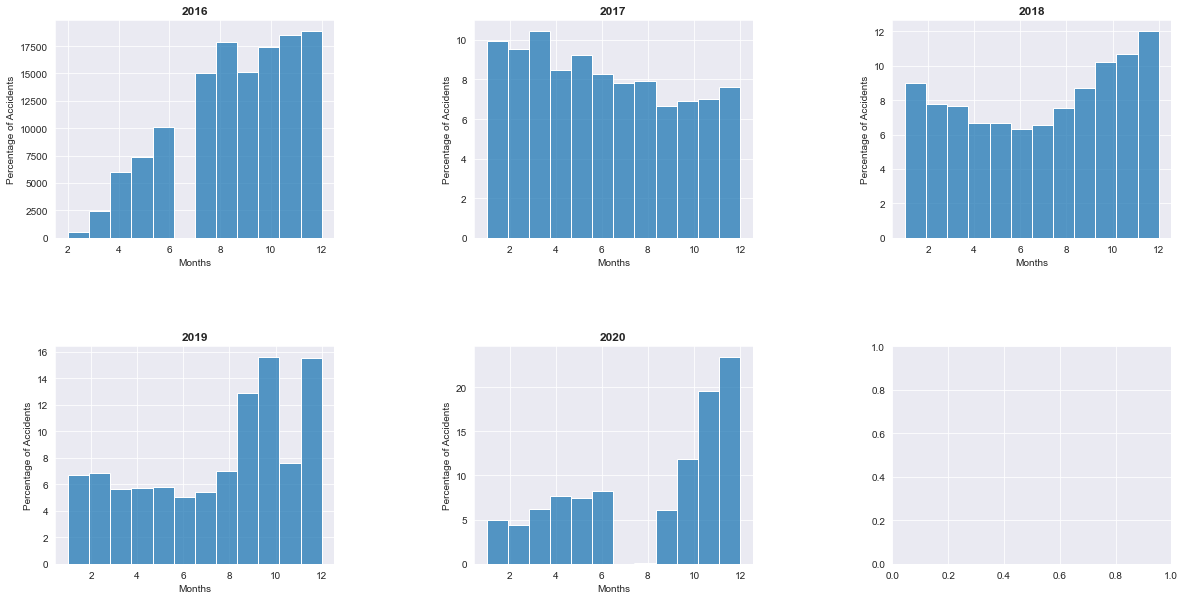

In [32]:
fig, ax = plt.subplots(nrows = 2,ncols = 3, figsize = (20,10), squeeze = False)    # This divides the figure into multiple subplots and each one of it can plot a different variable
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)                                    # Adjusts the horizontal and the vertical space of the plot w.r.t the labels and sides of the figure

sns.histplot(df_2016['Start_Time'].dt.month, ax = ax[0][0],bins = 12)
ax[0][0].set_title('2016',weight = 'bold')
ax[0][0].set_xlabel('Months')
ax[0][0].set_ylabel('Percentage of Accidents')

sns.histplot(df_2017['Start_Time'].dt.month, ax = ax[0][1],bins = 12, stat = 'percent')#.set(title = '2017')
ax[0][1].set_title('2017', weight = 'bold')
ax[0][1].set_xlabel('Months')
ax[0][1].set_ylabel('Percentage of Accidents')


sns.histplot(df_2018['Start_Time'].dt.month, ax = ax[0][2],bins = 12,stat = 'percent')#.set(title = '2018')
ax[0][2].set_title('2018', weight = 'bold')
ax[0][2].set_xlabel('Months')
ax[0][2].set_ylabel('Percentage of Accidents')


sns.histplot(df_2019['Start_Time'].dt.month, ax = ax[1][0],bins = 12,stat = 'percent')#.set(title = '2019')
ax[1][0].set_title('2019', weight = 'bold')
ax[1][0].set_xlabel('Months')
ax[1][0].set_ylabel('Percentage of Accidents')


sns.histplot(df_2020['Start_Time'].dt.month, ax = ax[1][1],bins = 12,stat = 'percent')#.set(title='2020')
ax[1][1].set_title('2020', weight = 'bold')
ax[1][1].set_xlabel('Months')
ax[1][1].set_ylabel('Percentage of Accidents')
# plt.subplot(1,2,2)
# sns.displot(df['Start_Time'].dt.month)
plt.show()

#### Insights
1. The data shows that for the years 2016 and 2020 there is virtually no data.
2. Thus the Hypothesis that lesser accidents happen in the months of July and August is Wrong because there is practically no data to support our reasoning.
3. For the years of 2017, 2018, 2019 we can see that the distributions of accidents is pretty uniform for all the months.

____________________________________________________________________________________________________________________________________________________________________________________________

### Start Latitude and Start Longitude
The start latitude and the Start Longitude columns in the DataFrame provide information about the geographic latitude and longitude for the accidents taking place.

In [33]:
df['Start_Lat'].head()

0    40.10891
1    39.86542
2    39.10266
3    39.10148
4    41.06213
Name: Start_Lat, dtype: float64

In [34]:
df['Start_Lng'].head()

0   -83.09286
1   -84.06280
2   -84.52468
3   -84.52341
4   -81.53784
Name: Start_Lng, dtype: float64

#### We could plot a scatterplot of the Start latitude and the Start Longitude to see the density of the accidents. For simplicity of the visualization we would only plot a 0.001 percent sample of the data.

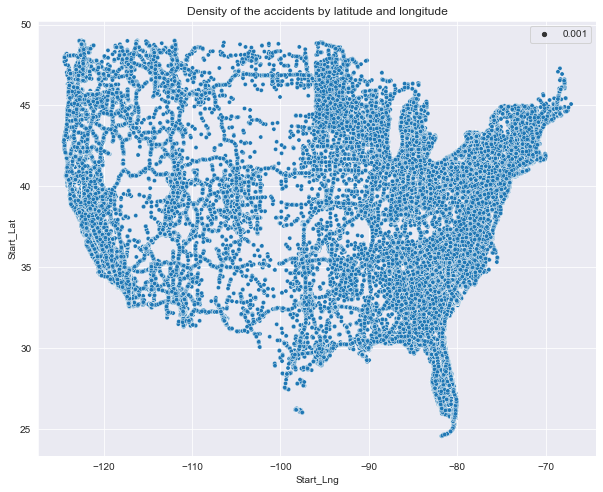

In [35]:
plt.figure(figsize = (10,8))
plt.title('Density of the accidents by latitude and longitude')
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat,size = 0.001)
plt.show()

The above figure shows us the density of accidents by their geographic latitude and longitude and these points in the scatter plot form a map of the United States of America.

### Geographical Maps with Folium

#### We could also plot a Map with markers of the accidents using a Pandas library called as Folium. Folium provides a quick and easy setup for Geographic Maps.

#### To plot Geographic Maps with Folium there are some steps that we need to follow
1. Create a Base Map of object of the region that we are trying to display.
2. Then we need to provide the Marker object with the data that we want to put on the Map.
3. The next step is to add the marker to the Base Map.

#### Create a Base Map with `folium.Map()`. The `location` paramters can be adjusted to get different regions of the world map and the zoom_start could be set to to prezoom to a particular are when the map loads.

In [36]:
Map = folium.Map(location = [30, -100], zoom_start = 4.3)

#### Now we would create the markers from the data. What we would so is that we would zip the latitude and the longitude column into a list of tuples and pass each `(lat, lng)` tuple to the `Marker()` method and then what we would do is that we would add the Markers object to the Map.

In [37]:
for lat, lon in list(zip(df.Start_Lat.sample(1000), df.Start_Lng.sample(1000))): # Here we would just zip 1000 data pointsof latitude and longitude
    marker = folium.Marker((lat, lon))
    marker.add_to(Map)

#### Now lets visualize the Map that we have plotted

In [38]:
Map

#### Insights
1. We can see that most of the accidents in this sample have happened at the coasts while the inner parts of US have a slighlty lesser number of accidents. This is explainable because about 30% of the US population lives along the coast.

__________________________________________________________________________________________________________________________________________________________________________________________________

### State Column
The state column provide us information about the states in which the accidents happened.

### The plotly package for plotting Data
`import plotly.express as px` - The plotly.express package provides a set of operations to create graphs faster without much hassle.\
`import  plotly.graph_objects as go` - the graph_object is used to create more nuanced graphs where more low level features of the graph can be customised.

#### Choropleth Maps with Plotly
* Choropleth Maps are types of Maps which have a predefined area is colored or patterned with respect to a statistical variable. For eg. States of a country shaded according to their respective population stats. Here we will plot a choropleth Map of US States on the basis of their accident count.
* For plotting Choropleth Maps what we would need to import the nescessary libraries of plotly because plotly provides very easy plotting of interactive plots with a wide variety of formats which can be readily used in HTML pages for building dashboards.

For plotting interactive maps first we need to make a dataframe of the states and their respective accident counts.\
The below DataFrame states_df provides us with state names and respective state abbreviations which would be used to label the various states in the map.

In [39]:
states_and_abbrevations_df = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')   # This data is downloaded from a github repository of Jason Nong
states_and_abbrevations_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


We will take the State column of our accidents dataframe and perform the following operations
* Get the value counts of accidents of the individual states.
* convert them into a DataFrame for merging it with the States and Abbrevations DataFrame.
* rest the index of the DataFrame and remove the index column as resetting the index causes the index to be converted to a column in the DataFrame by the name of Index.

In [40]:
accidents_by_state = df['State'].value_counts()                                                                       # take the value counts accidents of individual states
accidents_by_state_df = pd.DataFrame({'Abbreviation':accidents_by_state.index, 'count': accidents_by_state.values})   # convert it to a dataframe for merging
accidents_by_state_df.reset_index().drop(columns = 'index', inplace = True)                                           # remove the index and then drop the index column.
accidents_by_state_df.head()

,Abbreviation,count
0,CA,448833
1,FL,153007
2,OR,87484
3,TX,75142
4,NY,60974


####  Merge the states_and_abbrevations_df with the accidents_by_states_df to create an accidents_df which has the State name, State Abbrevations and count of the accidents. 

In [41]:
accidents_df = pd.merge(states_and_abbrevations_df, accidents_by_state_df, how = 'inner', on = 'Abbreviation')
accidents_df.head()

,State,Abbreviation,count
0,Alabama,AL,9375
1,Arizona,AZ,30185
2,Arkansas,AR,4373
3,California,CA,448833
4,Colorado,CO,19809


#### The Choropleth Map in plotly has roughly 2 parts.
1. The data of the Map
2. The layout of the Map

These parts are described standalone as Python dictionaries(key/value pairs) and then they are passed to the Figure object to generate the Plot and displayed by the `fig.show()` method.

In [42]:
data = dict(type = 'choropleth',   # Type of graph that is to plotted
           locationmode = 'USA-states',                       #  The  geographic base-figure which could be generated with partitions of states.
           locations = accidents_df['Abbreviation'],          # Array like data structure comprising of the locations of the partitions in accordance with the data (locating the states in a US map).
           colorscale = 'teal',                               # Color scheme to be used.
           hovertext = accidents_df['State'],                 # Text which would be displayed when hovering above a specific point on the plot (number of accidents and State Name).
           z = accidents_df['count'],                         # Data values which would decide the shade of the color schem. In this context the number of the accidents by state.
           colorbar = {'title': 'Accidents(High to Low)'})    # Colorbar which would be displayed on the right hand side for understanding the graph.


layout = dict(geo ={'scope':'usa'})                          # The layout of the Map


fig = go.Figure(data = [data],layout = layout )              # Putting both the data and the layout in the figure to plot the map.


# To customise the layout according to our preferences
fig.update_layout(                                          
    width = 1300,
    height = 500,
    margin = dict(l = 1, r = 500),         # r indicates distance of the plot from the right of the figure
    title_text = 'US Accidents by State',
    geo_scope='usa',) 

# Displaying the plot
fig.show()

#### Insights
1. The State of California has the largest number of accidents follwed by Florida.

__________________________________________________________________________________________________________________________________________________________________________________________________

### Temperature Column
The Temperture Column in the DataFrame provide information about the Temperature at which the accidents happend.

In [43]:
df['Temperature(F)'].head()

0    42.1
1    36.9
2    36.0
3    36.0
4    39.0
Name: Temperature(F), dtype: float64

#### The Temperature is in Fahrenheit so we could convert it into Celsius and also change the Name of the column by removing the F.

In [44]:
df.rename(columns = {"Temperature(F)":'Temperature'}, inplace = True)      # Renaming a column
df['Temperature'].head()

0    42.1
1    36.9
2    36.0
3    36.0
4    39.0
Name: Temperature, dtype: float64

Now we would convert the Temperature to celsius by defining a function that converts the Fahrenheit values to Celsius.

In [45]:
def func1(x):
    """ This function converts from Fahrenheit to Celsius """
    if pd.isna(x) == False:             # Checks that the value is Not Null 
        return int((x-32)*(5/9))        # Converts the value to celsius and it also converts it into integer datatype and return it
    else:
        return x

In [46]:
df['Temperature'] = df['Temperature'].apply(func1)     # apllying thr function to the Column by Series.apply() method

In [47]:
df['Temperature'].head()                               # We can see that the values are now in Celsius.

0    5.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: Temperature, dtype: float64

In [48]:
x = df['Temperature'].value_counts()     # The value_counts() method provides us with the sum of all occurence of a particular value
x.head()

17.0    66641
12.0    62165
13.0    58852
16.0    58444
21.0    58272
Name: Temperature, dtype: int64

#### We would plot the occurences of for the first 40 temperatures and the number of accidents associated with them

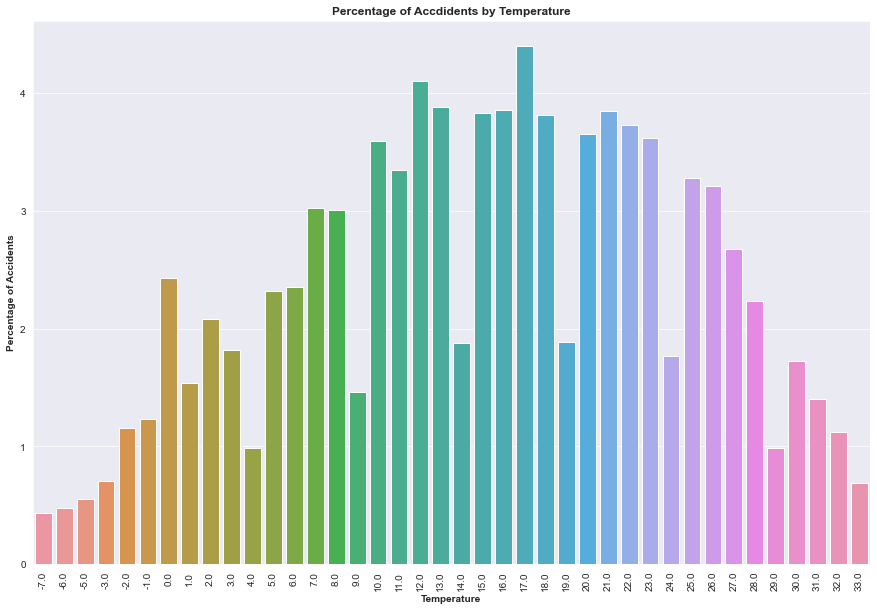

In [49]:
b = x.head(40)                                                          # The DataFrame.head(n) displays the first n rows of the DataFrame

plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.ylabel('Percentage of Accidents',weight = 'bold')
plt.xlabel('Temperature',weight = 'bold')
plt.title('Percentage of Accdidents by Temperature',weight = 'bold')
sns.barplot(x = b.index, y = b.values*100/len(df['Temperature']))
plt.show()

#### Insights
1. The above plot gives us the insight that a large percentage of accidents happen at 17&deg;C.
2. There is an unusual spike at 0&deg;C which could be worth investigating becuse it may be due to Snow as the winds become chilly.

#### We could explore the weather conditions and the Temperature column to see the distribution of of the accidents that happen at 0&deg;C

In [50]:
zero_degree_accidents_with_snow = df[(df['Temperature'] == 0.0) & (df['Weather_Condition'] == 'Snow')]                  # Filtering the DataFrame 
print(f"Number of accidents at Zero degree with Snowy weather Conditions : {zero_degree_accidents_with_snow.shape[0]}")

Number of accidents at Zero degree with Snowy weather Conditions : 715


#### As this is is a very small Number of accidents with respect to the size of the dataset which is 1.5 Million records we should see all the weather conditions having 500 or more accidents at 0&deg;C.

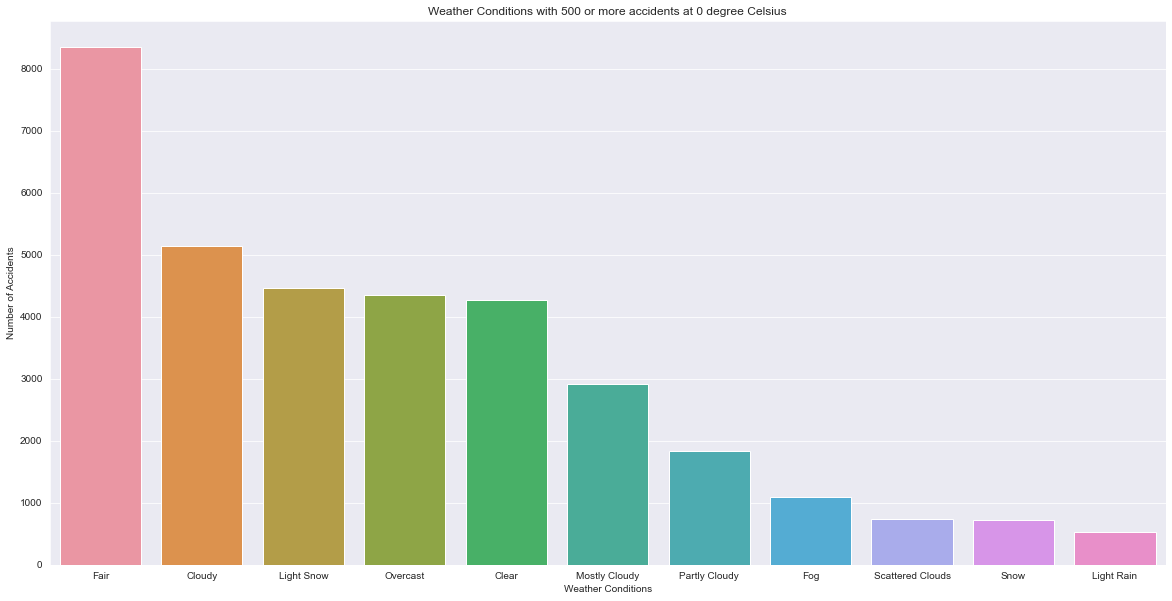

In [51]:
zero_degree = df[df['Temperature'] == 0.0]                       # Filtering the Tenperature Column by 0 degree celsius
zero_degree = zero_degree['Weather_Condition'].value_counts()    # Taking the count of the unique weather conditions of the accidents at 0 degree celsius
zero_degree_accidents = zero_degree[zero_degree.values>=500]     # Getting the weather conditions where the number of accidents is >= 500 at 0 degree celsius.


plt.figure(figsize = (20,10))
plt.title('Weather Conditions with 500 or more accidents at 0 degree Celsius')
plt.ylabel(f'Number of Accidents')
plt.xlabel('Weather Conditions')
sns.barplot(x = zero_degree_accidents.index, y = zero_degree_accidents.values)   # Plotting the values
plt.show()

#### Insights
1. The above plot shows that most of the accidents at 0&deg;C happen at Fair weather conditions.

____________________________________________________________________________________________________________________________________________________________________________________________________________

### Visbility Column
The visibility Column provides information of the visbility in Miles at which the accidents happend.

#### We can ask a question that do people drive more carefully if the visibility is Low or do more accidents happen at low visibility conditions

In [52]:
df['Visibility(mi)'].head()

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: Visibility(mi), dtype: float64

In [53]:
visibility_value_counts = df['Visibility(mi)'].value_counts()
visibility_value_counts.head()

10.0    1178150
7.0       44433
9.0       37704
8.0       30265
5.0       28883
Name: Visibility(mi), dtype: int64

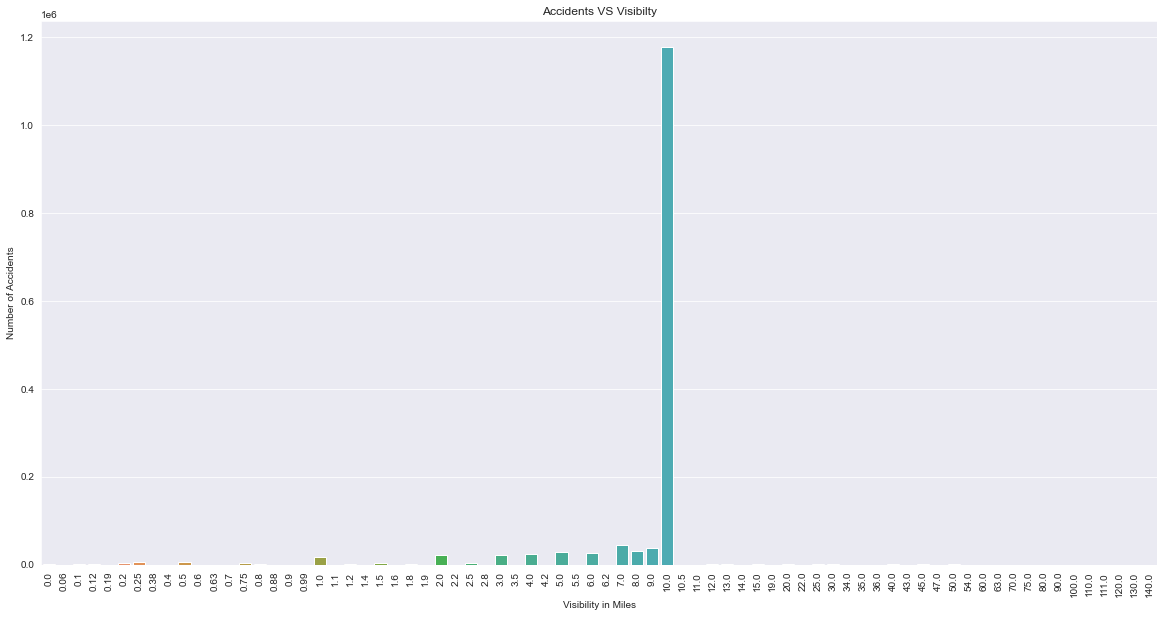

In [54]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.xlabel('Visibility in Miles')
plt.ylabel('Number of Accidents')
plt.title('Accidents VS Visibilty')
sns.barplot(x = visibility_value_counts.index, y = visibility_value_counts.values)
plt.show()

#### Insight
1. The plot above shows that most of the accidents happen at a Visibility of 10 miles and very few accidents happen at low visibility conditions.
2. But we should also plot very low visibilty because from the above plot above we can see that there are no accidents in very low visibility (visibility <= 2 miles)  conditions and see if it yeilds some more insights.

<AxesSubplot:xlabel='Visbility in Miles', ylabel='Number of Accidents'>

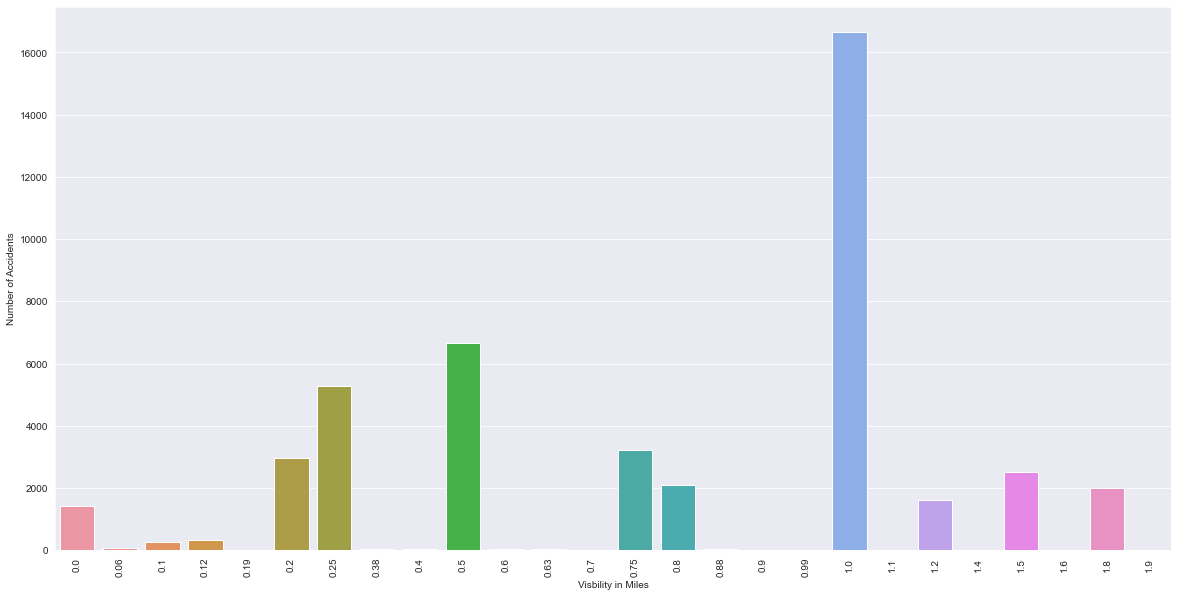

In [55]:
vis = df[df['Visibility(mi)'] < 2.0]
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.xlabel('Visbility in Miles')
plt.ylabel('Number of Accidents')
sns.barplot(x = vis['Visibility(mi)'].value_counts().index, y = vis['Visibility(mi)'].value_counts().values)

#### The plot above shows that most of the accidents happen at a Visibility of 10 miles and very few accidents happen at low visibility conditions.
But we should also plot very low visibilty because from the above plot above we can see that there are no accidents in very low visibility (visibility <= 2 miles) conditions and see if it yeilds some more insights.nsights
1. We can see that that accidents do happen at low visibility conditions but the rate is lower so we can safely say that our Hypothesis that people drive more carefully during low visibilty conditions is correct.

___________________________________________________________________________________________________________________________________________________________________________________________________________

### Amenities Column
The Amenities column is a Boolean Column which provides us with information about amenities such as hotels and roadside shops and diners.

In [56]:
df['Amenity'].value_counts()

False    1503661
True       12403
Name: Amenity, dtype: int64

#### Insights
Amenity is a Boolean Column which shows that most of the roads did not have amenities. So the drivers were probably deprived of water and other things maybe food which would lead to more accidents.

____________________________________________________________________________________________________________________________________________________________________________________________________

### Precipitation Column
The precipitation column information about the rainfall in inches at the time the accident was recorded.

In [57]:
df['Precipitation(in)'].value_counts()

0.00    903429
0.01     29157
0.02     14377
0.03      9895
0.04      7419
         ...  
1.95         1
1.36         1
1.64         1
9.65         1
1.73         1
Name: Precipitation(in), Length: 187, dtype: int64

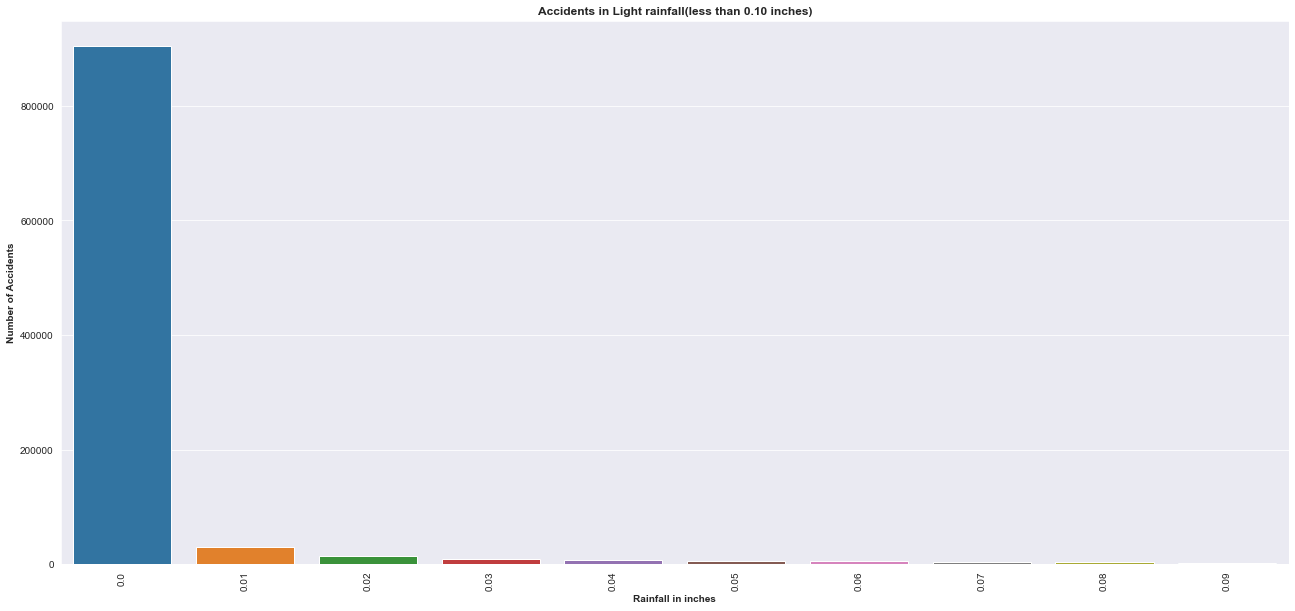

In [58]:
light = df[df['Precipitation(in)'] <0.10]
plt.figure(figsize = (22,10))
plt.xticks(rotation = 90)
plt.title('Accidents in Light rainfall(less than 0.10 inches)', weight = 'bold')
plt.xlabel('Rainfall in inches', weight = 'bold')
plt.ylabel('Number of Accidents', weight = 'bold')
sns.barplot(x = light['Precipitation(in)'].value_counts().index, y = light['Precipitation(in)'].value_counts().values )
plt.show()

#### Insights
1. We can see that the most of the accidents do not have a preciptation associated with them.

#### We will see how many accidents happend at 0.30 between 2.0 inches per hour which is the category of Heavy rainfall.

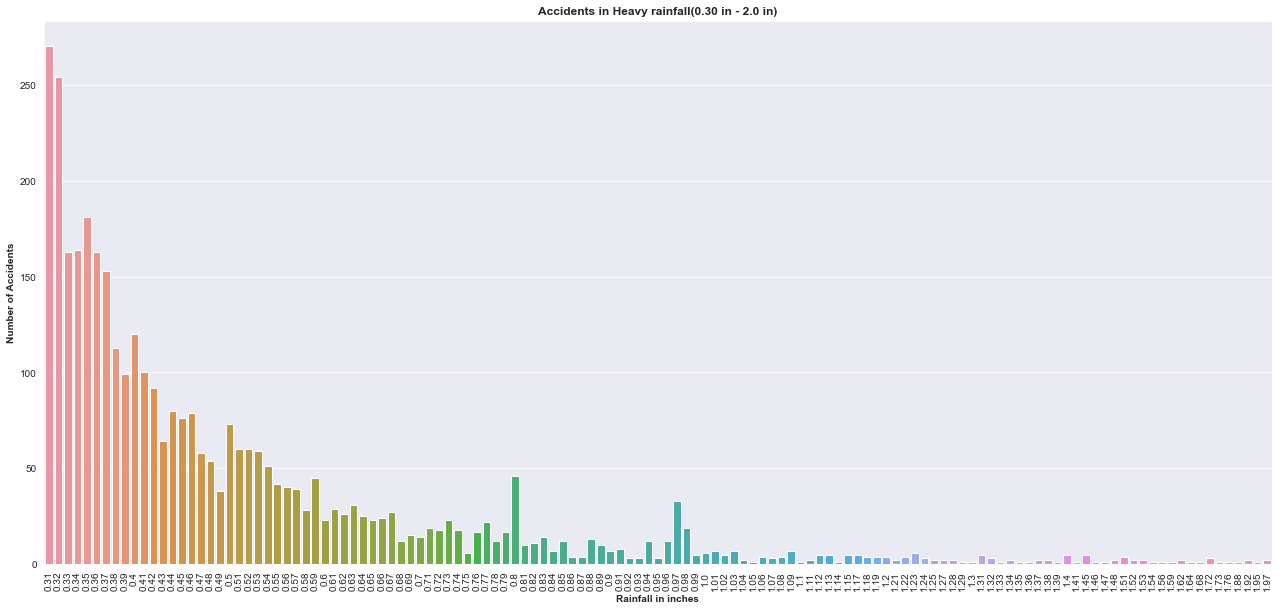

In [59]:
heavy = df[(df['Precipitation(in)'] >0.30) & (df['Precipitation(in)'] <= 2.0)]
plt.figure(figsize = (22,10))
plt.xticks(rotation = 90)
plt.title('Accidents in Heavy rainfall(0.30 in - 2.0 in)', weight = 'bold')
plt.xlabel('Rainfall in inches', weight = 'bold')
plt.ylabel('Number of Accidents', weight = 'bold')
sns.barplot(x = heavy['Precipitation(in)'].value_counts().index, y = heavy['Precipitation(in)'].value_counts().values )
plt.show()

#### Number of accidents in Moderate rainfall (0.10 - 0.30) inches

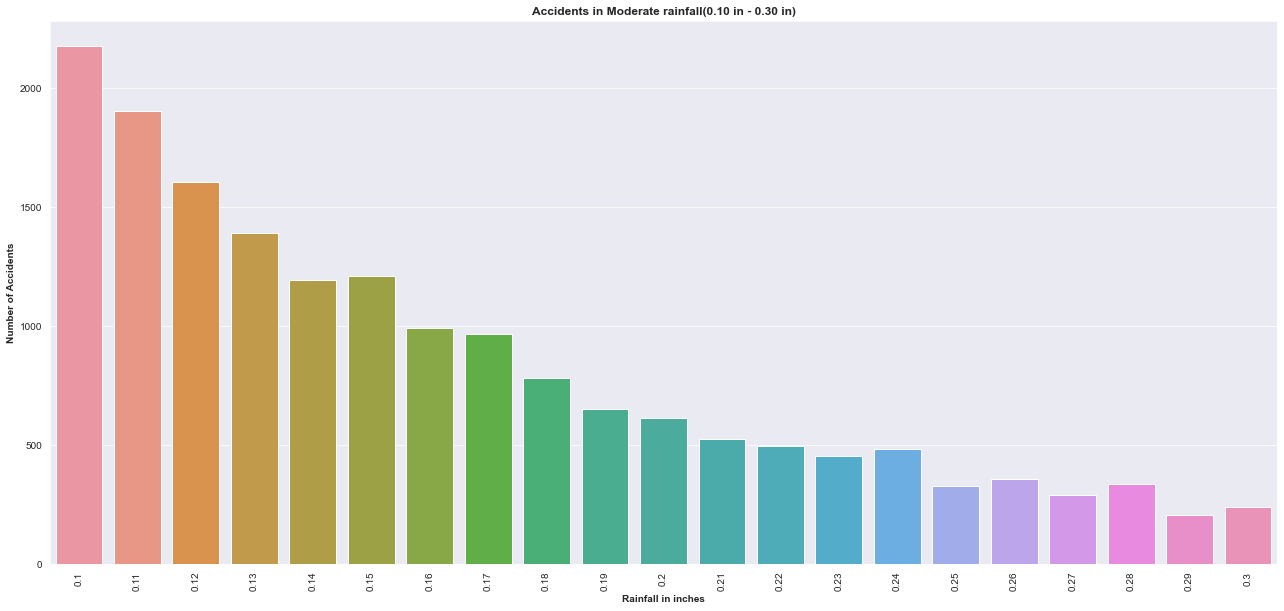

In [60]:
heavy = df[(df['Precipitation(in)'] >=0.10) & (df['Precipitation(in)'] <= 0.30)]
plt.figure(figsize = (22,10))
plt.xticks(rotation = 90)
plt.title('Accidents in Moderate rainfall(0.10 in - 0.30 in)', weight = 'bold')
plt.xlabel('Rainfall in inches', weight = 'bold')
plt.ylabel('Number of Accidents', weight = 'bold')
sns.barplot(x = heavy['Precipitation(in)'].value_counts().index, y = heavy['Precipitation(in)'].value_counts().values )
plt.show()

#### Insights
1. We see that most of the accidents happen in moderate rainfall i.e not too heavy and not too light but most of the accidents have no direct correlation with rainfall i.e they do not happen when its raining.

_________________________________________________________________________________________________________________________________________________________________________________________________________

### Severity Column
The Severity column provides the data of the severity of the accidents.

In [61]:
df['Severity'].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

The Sevrity column is a categorical column with severities from 1 to 4 (1 being least and 4 being the highest).

#### Here we will analyze the severity column with precipitation and weather conditions and find out that most severe accidents happen at what precipitation, Temperature and weather conditions.

In [62]:
severity_df = df[['Severity','Precipitation(in)','Weather_Condition', 'Temperature']]      # Taking out the columns into a new Smaller DataFrame
severity_df.head()

,Severity,Precipitation(in),Weather_Condition,Temperature
0,3,0.00,Light Rain,5.0
1,2,0.02,Light Rain,2.0
2,2,0.02,Overcast,2.0
3,2,0.02,Overcast,2.0
4,2,NaN,Overcast,3.0


#### Now we will group the severity dataframe in to groups by the severity categories.

In [63]:
severity_df = severity_df.groupby(by= 'Severity', as_index = True)   # this creates a groupby object with the severity column as index
severity_df                                   # When we try to display the Groupby object by calling the object we get the memory adress at which the object is located.

In [64]:
severity_4_df = severity_df.get_group(4)                           # Getting the group of Severity = 4 from the groupby object
severity_4_df.head()


,Severity,Precipitation(in),Weather_Condition,Temperature
21,4,NaN,Overcast,0.0
28,4,NaN,Light Snow,-5.0
41,4,NaN,Light Snow,-2.0
44,4,0.0,Light Snow,-6.0
45,4,0.0,Light Snow,-6.0


As we can see that all the entries in the DataFrame are for severity = 4.

In [65]:
severity_4_df['Weather_Condition'].value_counts()       # getting the value counts of the individual weather condition accident counts.

Clear                    25988
Fair                     19202
Mostly Cloudy            13929
Overcast                 13616
Partly Cloudy             8816
                         ...  
Freezing Rain / Windy        1
Blowing Snow / Windy         1
Funnel Cloud                 1
T-Storm / Windy              1
Blowing Dust / Windy         1
Name: Weather_Condition, Length: 81, dtype: int64

#### Now we will plot the data for the weather conditions where the accident count is greater than 500 and Severity = 4.

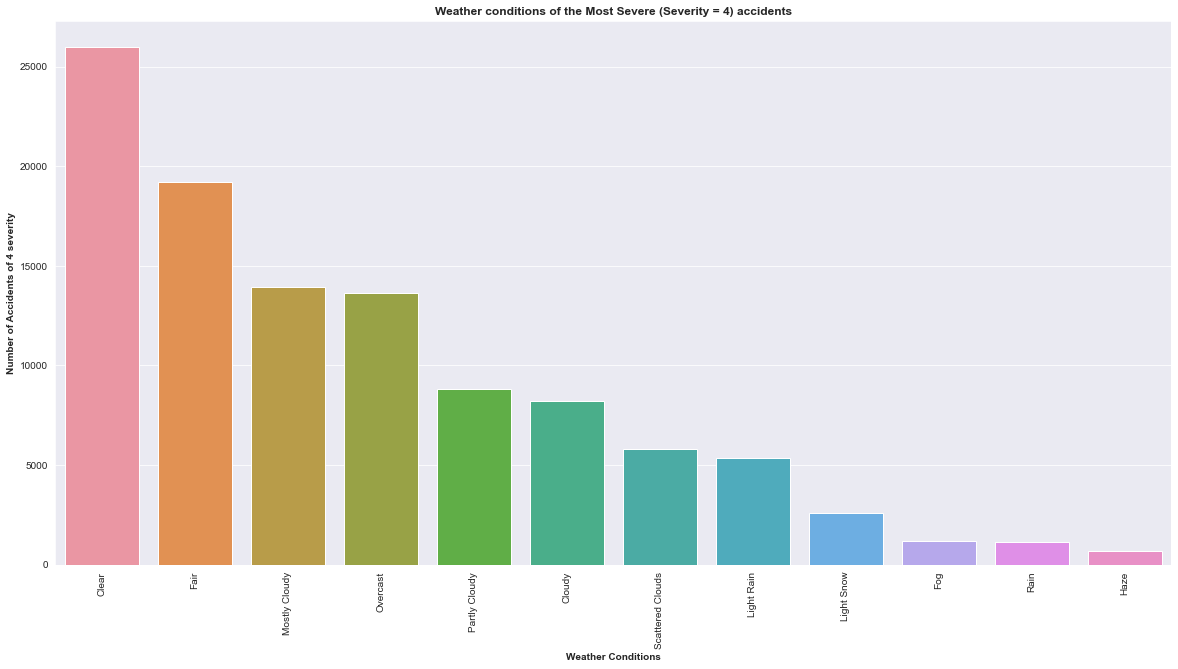

In [66]:
plt.figure(figsize = (20,10))
plt.title('Weather conditions of the Most Severe (Severity = 4) accidents', weight= 'bold')
plt.ylabel('Number of Accidents of 4 severity', weight= 'bold')
plt.xlabel('Weather Conditions', weight= 'bold')

plt.xticks(rotation = 90)
severe_weather = severity_4_df['Weather_Condition'].value_counts()
severe_weather_accidents = severe_weather[severe_weather.values >=500]

sns.barplot(x = severe_weather_accidents.index, y = severe_weather_accidents.values)
plt.show()

#### Insights
1. By Analyzing the plot above we can say that the largest number of accidents of Severity = 4 accidents happen in Clear Conditions

#### lets plot the Weather Conditions of Severity = 3 accidents

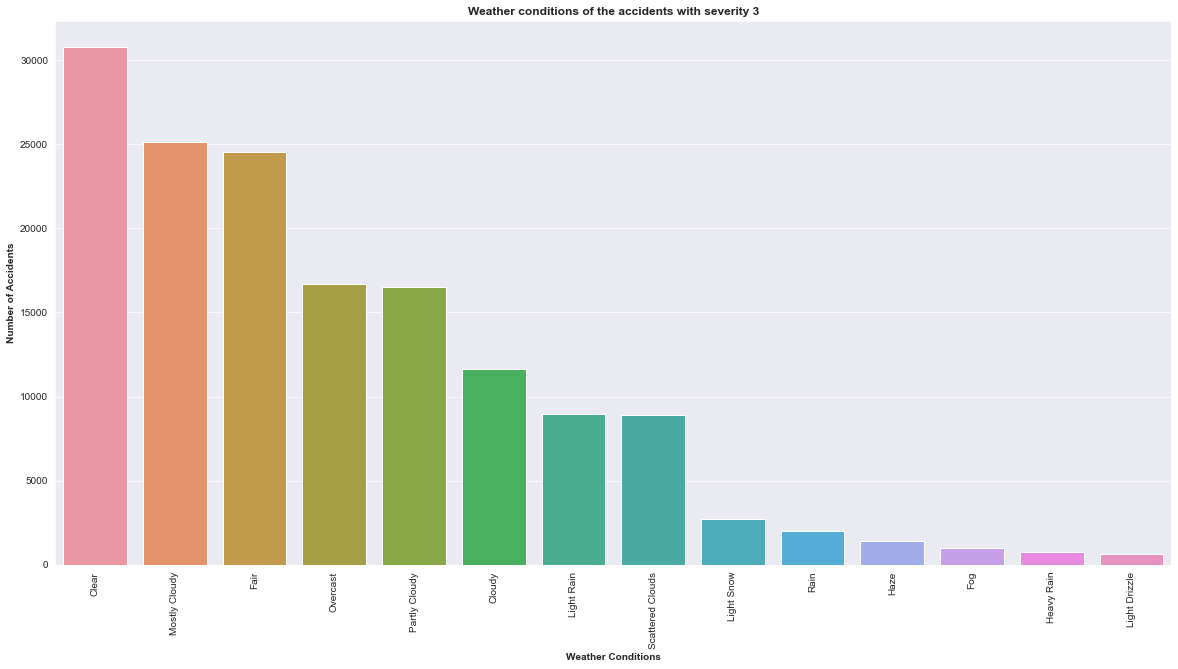

In [67]:
severity_3_df = severity_df.get_group(3)
plt.figure(figsize = (20,10))
plt.title('Weather conditions of the accidents with severity 3',weight = 'bold')
plt.ylabel('Number of Accidents',weight = 'bold')
plt.xlabel('Weather Conditions',weight = 'bold')

plt.xticks(rotation = 90)
severe_weather = severity_3_df['Weather_Condition'].value_counts()
severe_weather_accidents = severe_weather[severe_weather.values >=500]

sns.barplot(x = severe_weather_accidents.index, y = severe_weather_accidents.values)
plt.show()

### Insights
1. Here also the most accidents with severity = 3 happen under clear conditions.

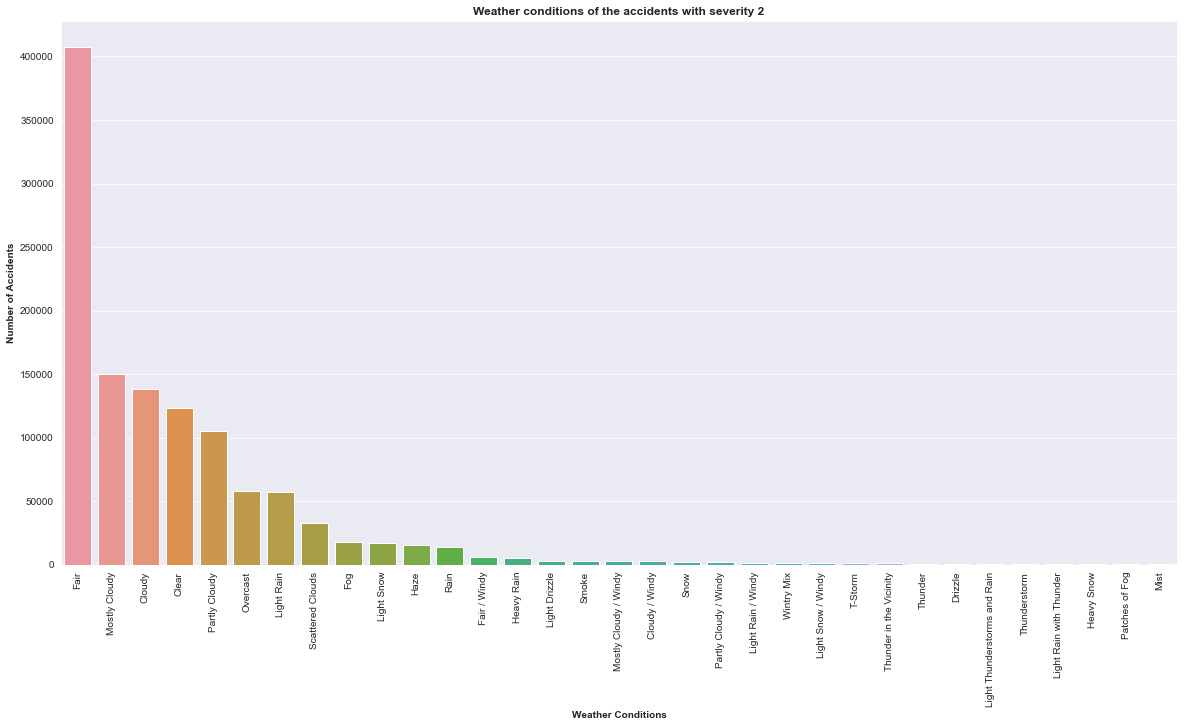

In [68]:
severity_2_df = severity_df.get_group(2)
plt.figure(figsize = (20,10))
plt.title('Weather conditions of the accidents with severity 2',weight = 'bold')
plt.ylabel('Number of Accidents',weight = 'bold')
plt.xlabel('Weather Conditions',weight = 'bold')

plt.xticks(rotation = 90)
severe_weather = severity_2_df['Weather_Condition'].value_counts()
severe_weather_accidents = severe_weather[severe_weather.values >=500]                

sns.barplot(x = severe_weather_accidents.index, y = severe_weather_accidents.values)
plt.show()

#### Insights
1. The most of the Moderately Severe accidents (severity = 2) happen under Fair conditions

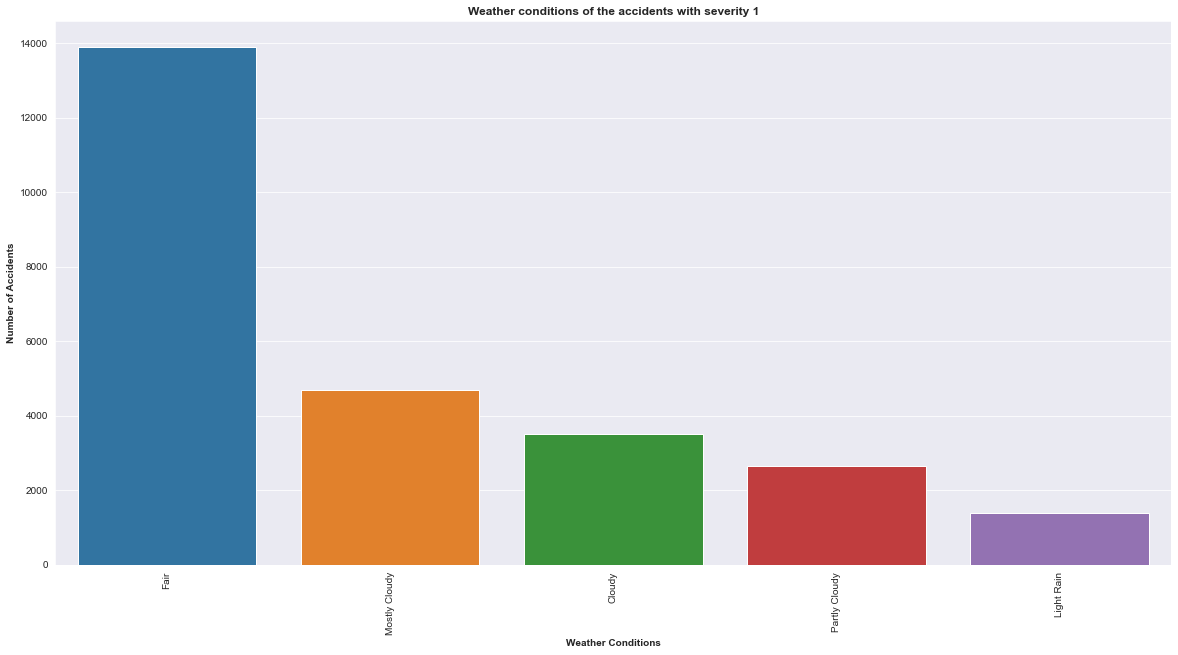

In [69]:
severity_1_df = severity_df.get_group(1)
plt.figure(figsize = (20,10))
plt.title('Weather conditions of the accidents with severity 1',weight = 'bold')
plt.ylabel('Number of Accidents',weight = 'bold')
plt.xlabel('Weather Conditions',weight = 'bold')

plt.xticks(rotation = 90)
severe_weather = severity_1_df['Weather_Condition'].value_counts()
severe_weather_accidents = severe_weather[severe_weather.values >=500]

sns.barplot(x = severe_weather_accidents.index, y = severe_weather_accidents.values)
plt.show()

#### Insights
1. The least severe accidents happen (Severity = 1) happen under Fair conditons.

#### Lets see at what precipitation do the most severe accidents happen.

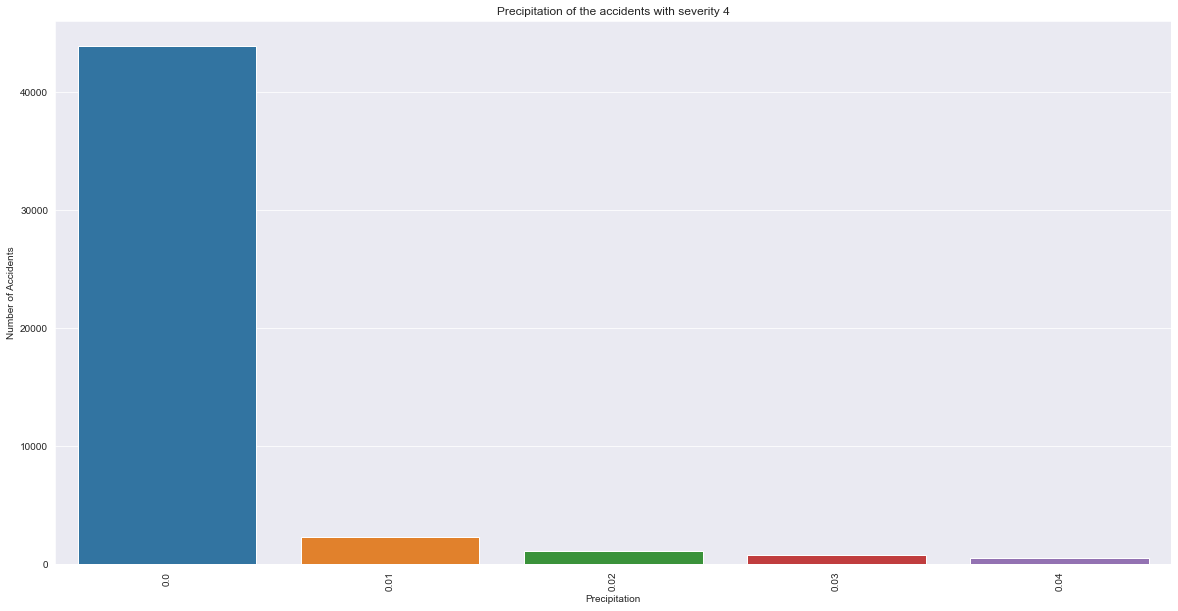

In [70]:
severity_4_df = severity_df.get_group(4)
plt.figure(figsize = (20,10))
plt.title('Precipitation of the accidents with severity 4')
plt.ylabel('Number of Accidents')
plt.xlabel('Precipitation')

plt.xticks(rotation = 90)
severe_weather = severity_4_df['Precipitation(in)'].value_counts()
severe_weather_accidents = severe_weather[severe_weather.values >=500]

sns.barplot(x = severe_weather_accidents.index, y = severe_weather_accidents.values)
plt.show()

#### Insights
1. The most severe accidents happen when there is no precipitaion at all.

#### Lets see at what temperature the most severe accidents happen.

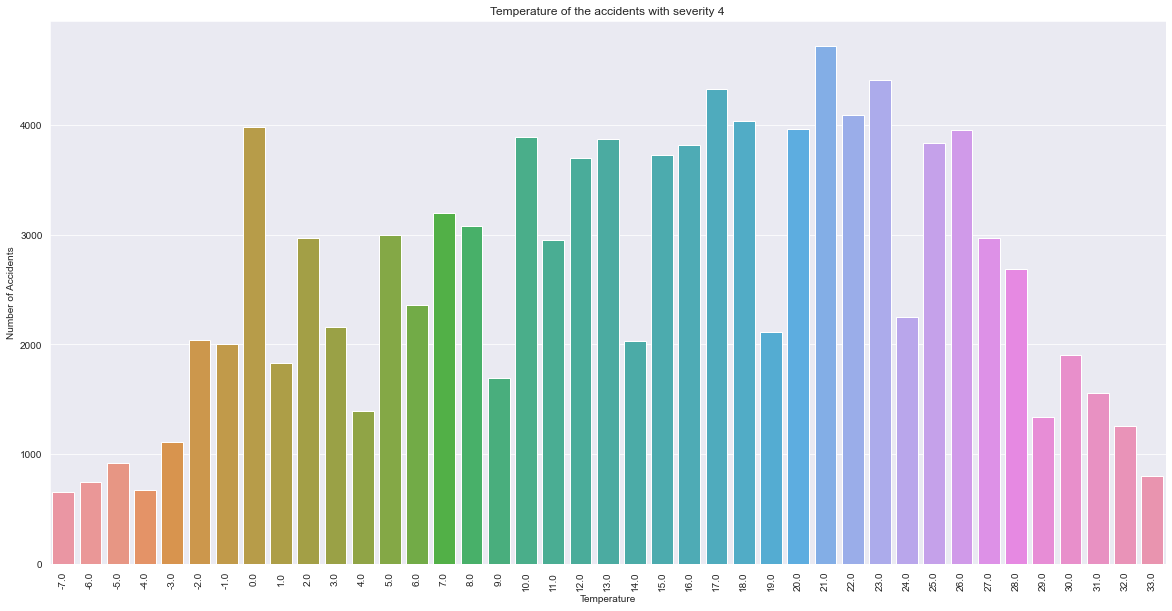

In [71]:
severity_4_df = severity_df.get_group(4)
plt.figure(figsize = (20,10))
plt.title('Temperature of the accidents with severity 4')
plt.ylabel('Number of Accidents')
plt.xlabel('Temperature')

plt.xticks(rotation = 90)
severe_weather = severity_4_df['Temperature'].value_counts()
severe_weather_accidents = severe_weather[severe_weather.values >=500]
# sns.barplot(x = severe_weather.index, y = severe_weather.values)
sns.barplot(x = severe_weather_accidents.index, y = severe_weather_accidents.values)
plt.show()

#### Insights
1. The most severe accidents happen at 21&deg;C.

#### At what time of the day do the most severe accidents happen ?

In [72]:
severity_4_df = df.groupby(by = 'Severity').get_group(4)
severity_by_hour = severity_4_df['Start_Time'].dt.hour.value_counts()

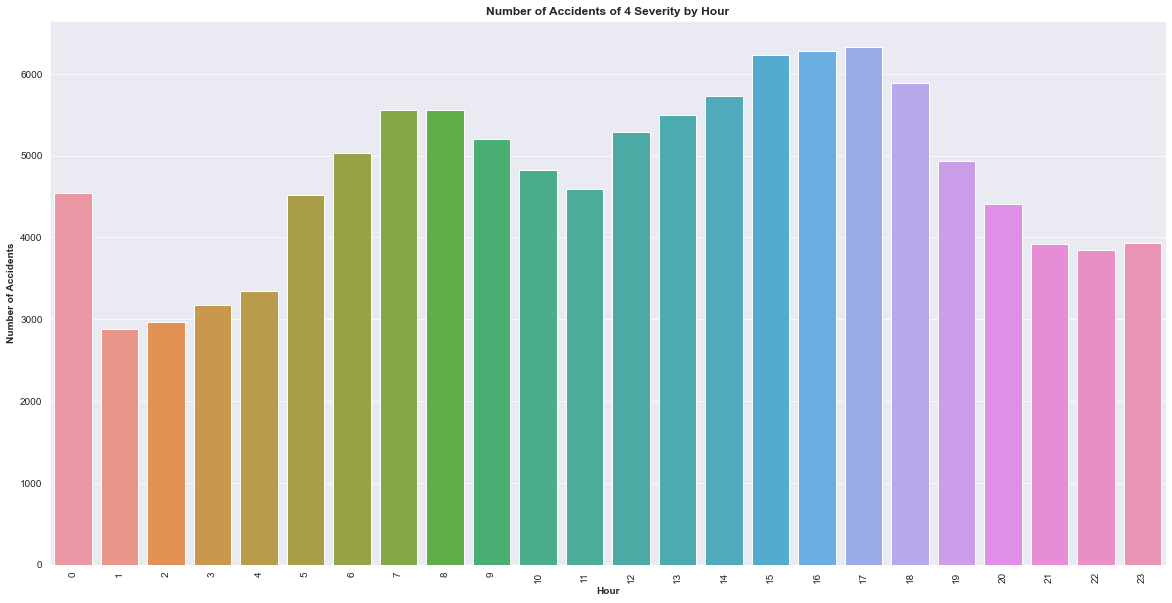

In [73]:
plt.figure(figsize = (20,10))
plt.title('Number of Accidents of 4 Severity by Hour', weight = 'bold')
plt.xlabel('Hour', weight = 'bold')
plt.ylabel('Number of Accidents', weight = 'bold')
plt.xticks(rotation = 90)
sns.barplot(x = severity_by_hour.index , y = severity_by_hour.values)
plt.show()

#### This shows that the most severe accidents happen between 3 pm - 6pm which is when people are coming home from work and between 7 am - 8 am which is people going to work.

#### Now lets see at what day do te most severe accidents happen?

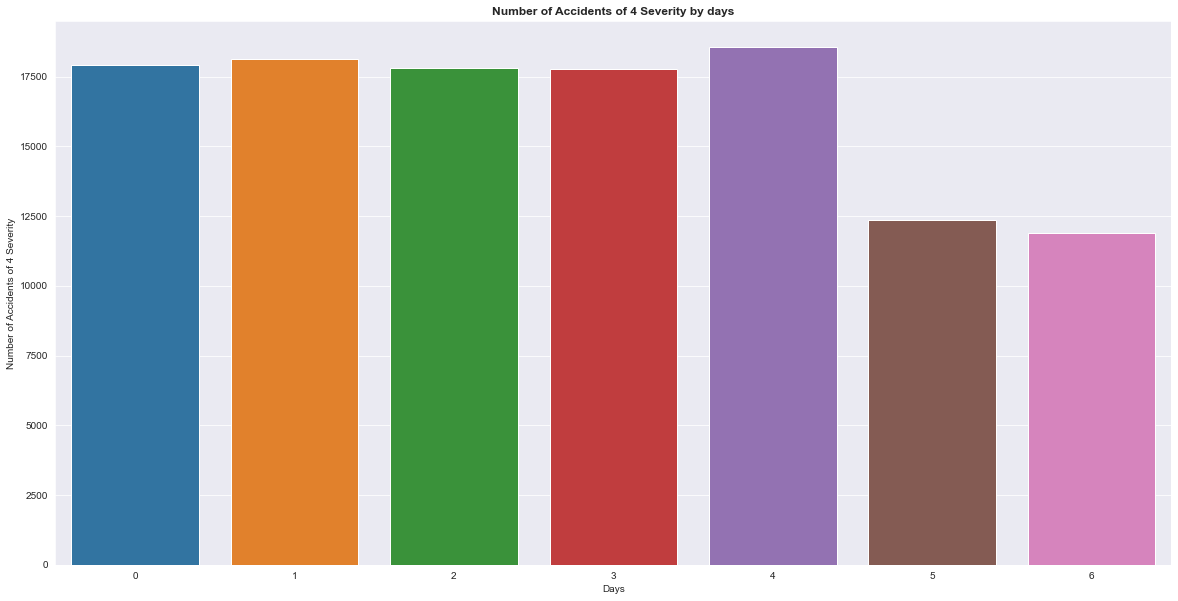

In [74]:
severity_4_df = df.groupby(by = 'Severity').get_group(4)
severity_by_day = severity_4_df['Start_Time'].dt.weekday.value_counts()
fig, ax = plt.subplots(figsize = (20,10))
plt.title('Number of Accidents of 4 Severity by days', weight = 'bold')
plt.xlabel('Days')
plt.ylabel('Number of Accidents of 4 Severity')
"""
{0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

"""
sns.barplot(x = severity_by_day.index , y = severity_by_day.values)
plt.show()

#### Insights
1. Most Severe accidents happen on the weekdays and they are distributed evenly on the weekdays.
2. The weekends see a fewer number of High severity accidents.

#### Lets see if there is any particular city where the most severe accidents happen.

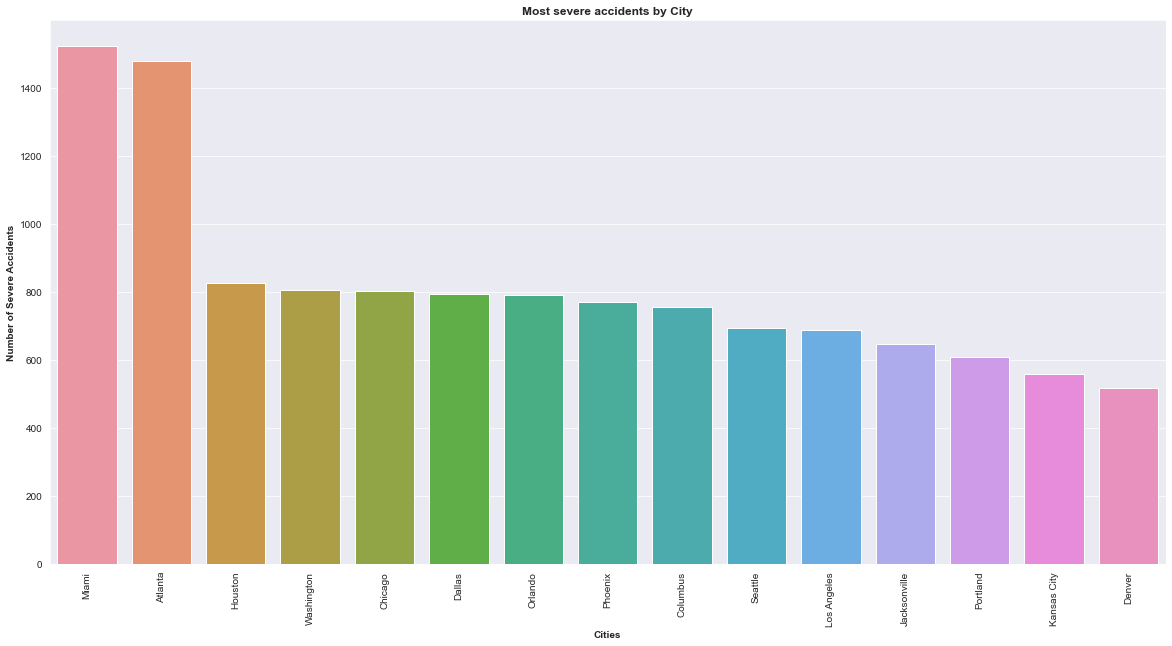

In [75]:
severe_accidents = df.groupby(by='Severity').get_group(4)
severe_by_city = severe_accidents['City'].value_counts()
severe_by_city = severe_by_city[severe_by_city.values >= 500]
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.xlabel('Cities', weight = 'bold')
plt.ylabel('Number of Severe Accidents', weight = 'bold')
plt.title('Most severe accidents by City', weight = 'bold')
sns.barplot(x = severe_by_city.index, y = severe_by_city.values)
plt.show()

#### Insights
1. The Cities of Miami and Atlanta have significantly higher severe accidents than the other cities.

#### Lets see the cities where mosst of the severity = 3 accidents happen.

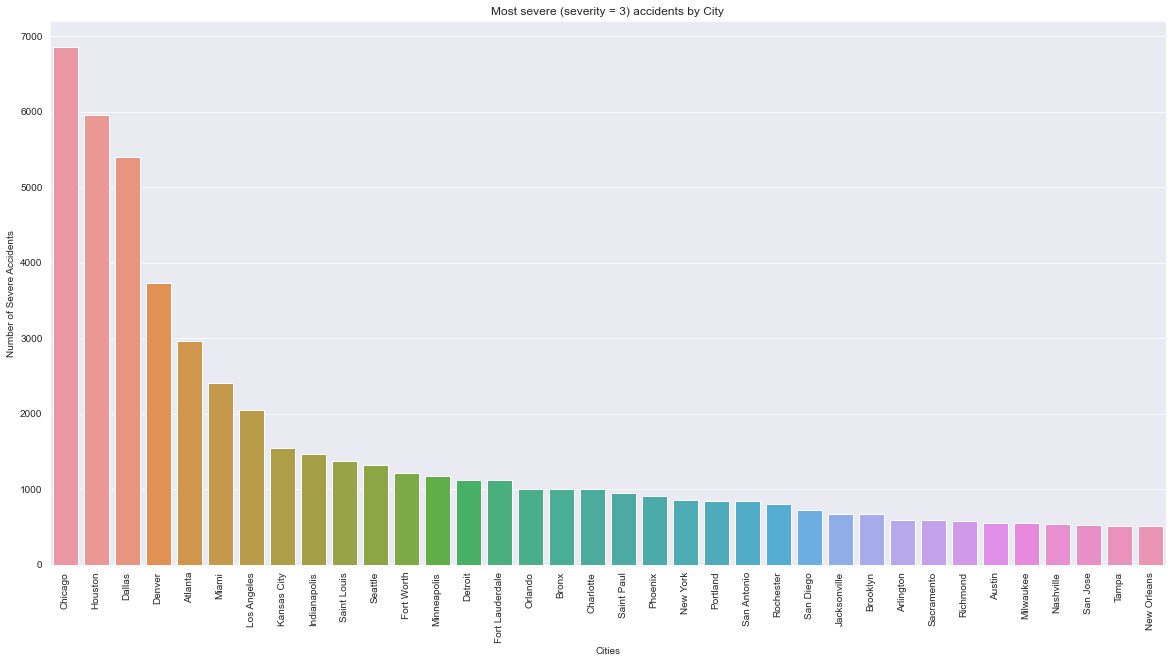

In [76]:
severe_accidents = df.groupby(by='Severity').get_group(3)
severe_by_city = severe_accidents['City'].value_counts()
severe_by_city = severe_by_city[severe_by_city.values >= 500]
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.ylabel('Number of Severe Accidents')
plt.title('Most severe (severity = 3) accidents by City')
sns.barplot(x = severe_by_city.index, y = severe_by_city.values)
plt.show()

#### Insights
1. The cities of Chicago and Houston have the most of the severity = 3 accidents.

__________________________________________________________________________________________________________________________________________________________________________________________________________

## Summary of Insights
1. City
    * The cities of Los Angeles and Miami have the highest number of Accidents.
    * New York Though it is a bustling city has a dramatically lower accident rate as compared to other cities.
2. Start_Time
    * A high percentage of accidents occur between 6 - 10 am. Probably people in a hurry to get to work.
    * Then the percentage of accidents drop between 11am - 3pm.
    * The highest percentage of accidents occur between 2pm - 7pm with the highest being recorded at 5pm. So probably people rushing to get home after work.
    * The Accidents by the year follow an exponentially increasing trend. But this might be because case that the data for the year 2020 has been the most documented.
    * On weekdays the number of accidents is significantly higher.
    * On weekends the number of accidents is lower.
    * On saturdays and sundays the accidents are more distributed and no peak hours are there.
    * On mondays the accident have a very dominant peak between 8 - 10 am and between 5-7 pm indicating that the hypothesis was correct as more accidents happen at rush hour.
    * The months data shows that months between OCT - DEC have the most accidents.
    * The month of July and August has the least number accidents.
    * The data shows that for the years 2016 and 2020 there is virtually no data for July and August months.
    * Thus the Hypothesis that lesser accidents happen in the months of July and August is Wrong because there is practically no data to support our reasoning.
    * For the years of 2017, 2018, 2019 we can see that the distributions of accidents is pretty uniform for all the months.
3. Start_Latitude and Start_longitude
    * We can see that most of the accidents in this sample have happened at the coasts while the inner parts of US have a slighlty lesser number of accidents. This is explainable              because about 30% of the US population lives along the coast.
4. State
    * The State of California has the largest number of accidents.
5. Temperature
    * A large percentage of accidents happen at 17°C.
    * There is an unusual spike at 0°C which could be worth investigating becuse it may be due to Snow as the winds become chilly.
    * The plots show that most of the accidents at 0°C happen at Fair weather conditions.
6. Visibility
    * The plots show that most of the accidents happen at a Visibility of 10 miles and very few accidents happen at low visibility conditions.
    * We can see that that accidents do happen at low visibility conditions (visibility <= 2 miles) but the rate is lower so we can safely say that our Hypothesis that people drive more carefully during low visibilty conditions is correct.
7. Amenities
    * Amenity is a Boolean Column which shows that most of places where the accidents happened did not have amenities nearby. So the drivers were probably deprived of food, water and other things which could have lead to more accidents.
8. Precipitation
    * Most of the accidents do not have a preciptation associated with them.
    * For the accidents which do happen in rainfall most of the accidents happen under moderate rainfall conditions.
    * Very few accidents happen under heavy rainfall conditions.
9. Severity Column
    * Most Severe accidents of `(Severity = 4)`  happen in `Clear Weather Conditions`.
    * The most accidents with `(Severity = 3)` happen under `Clear Weather conditions`.
    * The most of the Moderately Severe accidents `(Severity = 2)` happen under `Fair Weather conditions`.
    * The least severe accidents happen `(Severity = 1)` happen under `Fair Weather conditons`.
    * The most severe accidents happen when there is no precipitaion at all.
    * The most severe accidents happen at 21°C.
    * This shows that the most severe accidents happen between 3 pm - 6pm which is when people are coming home from work and between 7 am - 8 am which is people going to work.
    * Most Severe accidents happen on the weekdays and they are distributed evenly on the weekdays. The weekends see a fewer number of High severity accidents.
    * The Cities of Miami and Atlanta have significantly higher severe accidents than the other cities.
    * The cities of Chicago and Houston have the most of the severity = 3 accidents.

### Future Work
This by no means is a Comprehensive analysis of the dataset. I have done the analysis of the columns which interested me the most and people can download the dataset and experiment with their own columns and they are more than welcome to further my analysis.
* Some of the Columns that could be explored are :-
    * `Street` on which the accident happened.
    * Do a NLP analysis on the `Description` Column.
    * `Side` of the street where the accident happened.
    * `Humidity` and `Wind Chill` and `Pressure` columns to unearth any weather phenomenon on which the accidents happened like a Tornado.
    * `Roundabout` and `Traffic Signal` columns.

#### References 
Below provided are the links to the documentations for the libraries used
1. `Python` - https://docs.python.org/3/
2. `Pandas` - https://pandas.pydata.org/docs/
3. `Numpy` - https://numpy.org/doc/
4. `Matplotlib` - https://matplotlib.org/stable/
5. `Seaborn` - https://seaborn.pydata.org/index.html
6. `Folium` - https://python-visualization.github.io/folium/
7. `US Accidents Dataset` - https://www.kaggle.com/sobhanmoosavi/us-accidents 
8. `Accident Image url` - https://in.pinterest.com/pin/647533252665093717/

### Thankyou
I would like to thank the reader for taking out time to read this Analysis. Questions, Comments and Suggestions on improving are welcome and greatly appreciated. With your support I will try to build better reports in the future and provide you with better insights.